Importing the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

When the disk is rotating at a fixed angular velocity

In [2]:
_time = np.arange(0, 20, 0.001)
# _time = np.linspace(0, 20, 2000)
_fixed_omega = 400*np.pi
_fixed_omega_t = np.rad2deg(_fixed_omega*_time)
# _fixed_disp = _fixed_omega_t.cumsum() * 0.01 # displacement in radians
_fixed_disp = _fixed_omega_t # displacement in radians

In [3]:
for idx, i in enumerate(_fixed_disp):
    if np.mod(i, np.rad2deg(2*np.pi)) == 0.:
        # print(i, idx, np.mod(i, np.rad2deg(2*np.pi)), _time[idx])
        pass

Defnining the constants

In [44]:
_time = np.arange(0, 1, 0.000001)
_omega_o = 400 * np.pi
_omega_v = 2 * np.pi
_omega_delta = 10 * np.pi
_omega_t = _omega_o + _omega_delta * np.sin(_omega_v * _time)

_disp_t = _omega_t.cumsum() * 0.01 # displacement in radians

for idx, i in enumerate(_disp_t):
    if np.mod(i, 2*np.pi) == 0.:
        print(i, idx, np.mod(i, 2*np.pi), _time[idx])

12.566370614359172 0 0.0 0.0


In [45]:
phi = 3.14

_w_omega_t = 400*phi*_time - 5*np.cos(2*phi*_time) +5
_w_omega_t = np.rad2deg(_w_omega_t)

for idx, i in enumerate(_w_omega_t):
    if np.mod(i, np.rad2deg(2*phi))<0.0199:
        pass
        # print(i, idx, np.mod(i, np.rad2deg(2*np.pi)), _time[idx])

In [46]:
# import numpy as np
import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return idx

In [47]:
pulse = np.zeros(len(_time))

trigger = False
trigger_idx = 0
true_id = 0

for idx, i in enumerate(_w_omega_t):
    if np.mod(i, np.rad2deg(2*phi))== 0:
        pulse[idx] = 1
        trigger = True
        trigger_idx = idx

    if idx < true_id:
        pulse[idx] = 1

    if trigger:
        val = _w_omega_t[idx] + 5
        true_id = find_nearest(_w_omega_t, val)


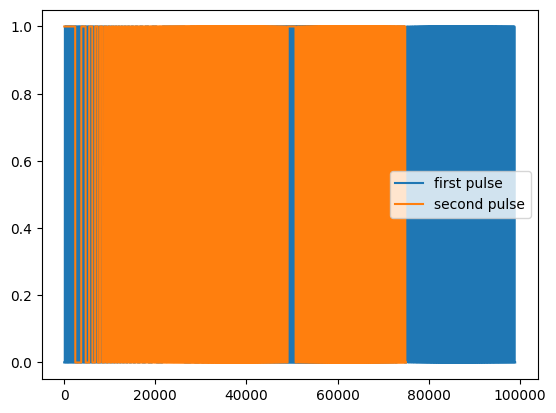

In [32]:
# plt.plot(_time, pulse)
adder = 100000
plt.plot(pulse[1000:1000 + adder], label = 'first pulse')
plt.plot(pulse[25000:25000+ adder], label='second pulse')
plt.legend()

In [33]:
_w_omega_t_lst = list(_omega_t)
max_value = max(_w_omega_t_lst)
max_index = _w_omega_t_lst.index(max_value)
print(max_value, max_index)

1288.0529879718151 25000


In [48]:
_est = np.zeros(len(_time))

t1 = 0

for idx, i in enumerate(_w_omega_t):
    if idx == 0:
        _est[idx] = 0
    if (np.mod(i, np.rad2deg(2*phi)) < 0.02) and idx != 0:
        print(_time[idx] - t1, i, idx)
        _est[idx] = 2*np.rad2deg(phi)/(_time[idx] - t1)
        t1 = _time[idx]
    else:
        _est[idx] = _est[idx-1]
    

0.019969 1439.288816620887 19969
0.009960999999999998 2158.9131685293482 29930
0.004975 2518.741093854355 34905
0.004970999999999996 2878.5523072865526 39876
0.009931000000000002 3598.186132228572 49807
0.004959999999999999 3958.0027319693704 54767
0.024747000000000005 5757.086170973533 79514
0.014807999999999988 6836.547046387783 94322
0.009856000000000004 7556.167867848247 104178
0.02459 9355.270761452932 128768
0.019625000000000004 10794.53008218443 148393
0.009799000000000002 11514.16687998374 158192
0.009790999999999994 12233.807388363422 167983
0.014672999999999992 13313.257624272519 182656
0.053707000000000005 17271.255964033797 236363
0.03414800000000001 19789.969866950243 270511
0.01952100000000001 21229.240289745474 290032
0.014649999999999996 22308.702407596476 304682
0.039127999999999996 25187.23755703612 343810
0.004898999999999987 25547.042207808507 348709
0.009805000000000008 26266.686297144264 358514
0.004905999999999966 26626.51195767684 363420
0.009819000000000022 273

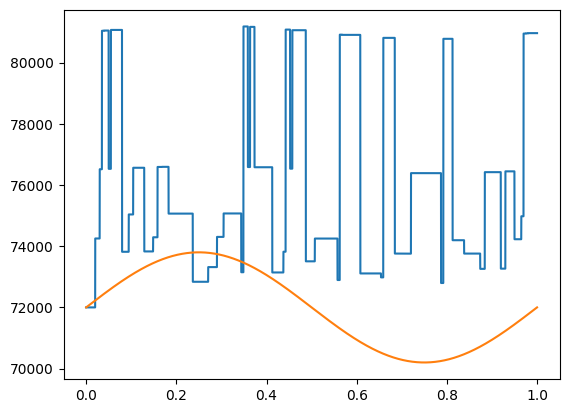

In [49]:
plt.plot(_time, _est/8 + 72000, label = 'actual')
plt.plot(_time, np.rad2deg(_omega_t))

In [12]:
# _est = np.zeros(len(_time))
_est

array([    0.        ,     0.        ,     0.        , ...,
       70175.43859649, 70175.43859649, 70175.43859649])

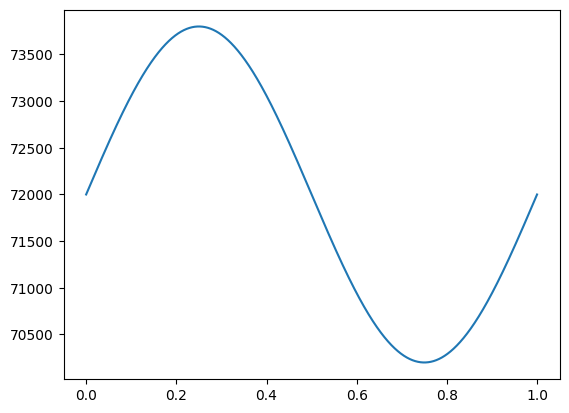

In [13]:
plt.plot(_time, np.rad2deg(_omega_t))

In [14]:
_omega_t

array([1256.63706144, 1256.63903536, 1256.64100928, ..., 1256.63113967,
       1256.63311359, 1256.63508752])

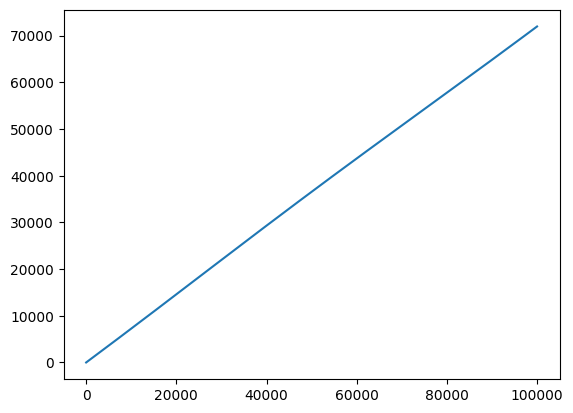

In [15]:
df = pd.DataFrame({'time': _time, 'omega': _w_omega_t})

# plt.plot(_w_omega_t[:20])
plt.plot(_w_omega_t)
# plt.plot(df["omega"])

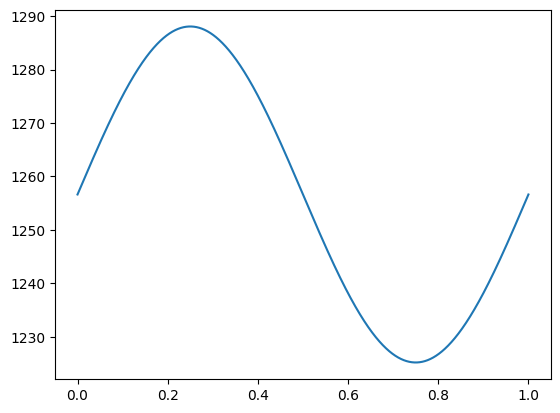

In [16]:
plt.plot(_time, _omega_t)

In [17]:
_disp = integrate.cumtrapz(_omega_t, _time, initial=0)

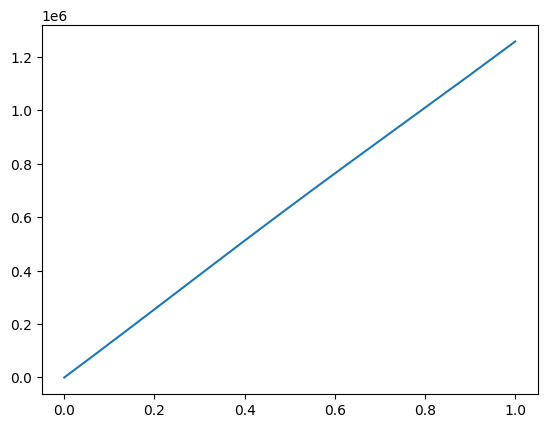

In [18]:
plt.plot(_time, _disp_t)

In [19]:
(4*150* 10* 10**-3)/3.3



1.8181818181818183

In [20]:
(4*10**-2)/3.3

0.012121212121212123

In [21]:
10*(10**-3)*150/3.3

0.4545454545454546